### Part 1 ‐ Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading logins.json into pandas DataFrame
logins_df = pd.read_json("logins.json")
logins_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
len(logins_df)

93142

In [4]:
logins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
# create a column count and set all rows values to 1
logins_df['count'] = 1
logins_df.head()

,login_time,count
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


In [6]:
# group time every 15 mins
login_15mins_df = logins_df.groupby(pd.Grouper(key='login_time',freq='15min')).count()
login_15mins_df.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


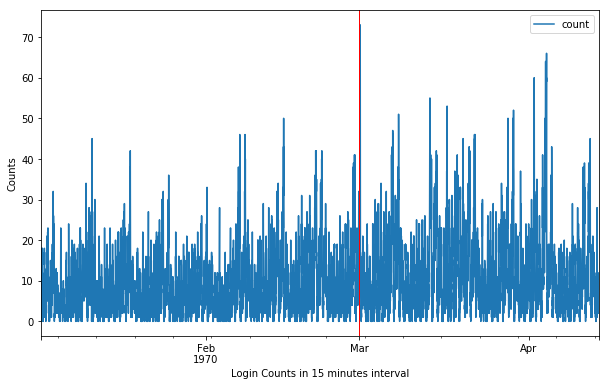

In [7]:
# plot the logins count for every 15 minutes
login_15mins_df.plot(figsize=(10,6))
plt.xlabel('Login Counts in 15 minutes interval')
plt.ylabel('Counts')
plt.axvline('1970-03-01', color='red', linewidth=1)
plt.show()

From the plot we can see logins activity is more between March and April and maximum activity on 1 March.

In [8]:
# group time in daily interval
login_day_df = logins_df.groupby(pd.Grouper(key='login_time',freq='D')).count()
login_day_df.head()

,count
login_time,
1970-01-01,112
1970-01-02,681
1970-01-03,793
1970-01-04,788
1970-01-05,459


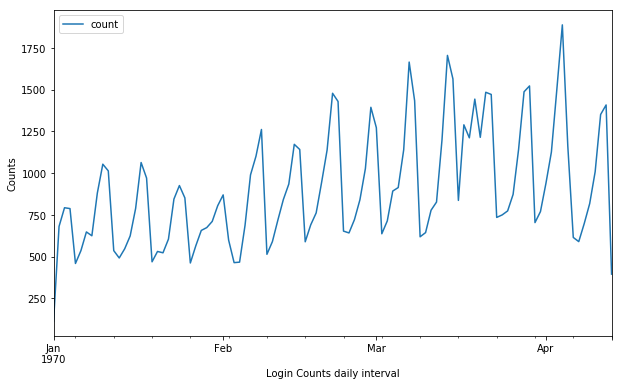

In [9]:
# plot the logins count for every day
login_day_df.plot(figsize=(10,6))
plt.xlabel('Login Counts daily interval')
plt.ylabel('Counts')
plt.show()

- Login activities increased from February to April with maximum in March. 
- Every month has 4-5 peaks might be due to higher weekend activities
- One particular time period or week in the month of March has multiple peaks which might be due to some holidays or somthing we have to figure out.

In [10]:
# group time in monthly interval
login_month_df = logins_df.groupby(pd.Grouper(key='login_time',freq='M')).count()

login_month_df.head()

,count
login_time,
1970-01-31,21239
1970-02-28,24673
1970-03-31,33723
1970-04-30,13507


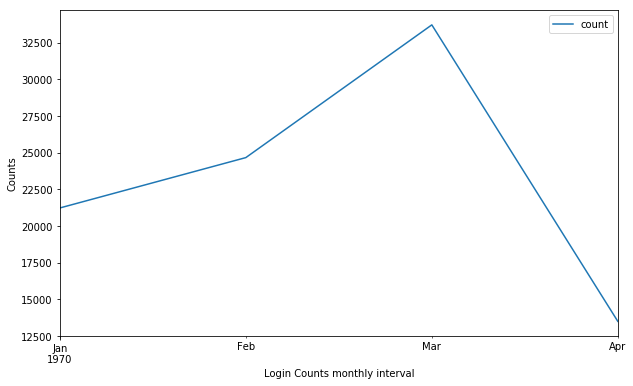

In [11]:
# plot the monthly logins count 
login_month_df.plot(figsize=(10,6))
plt.xlabel('Login Counts monthly interval')
plt.ylabel('Counts')

plt.show()

- We can see from the dailly and monthly interval plot that, the login activity increased from February to April and it's maximum in March.

In [12]:
# group time in hourly interval
login_hourly_df = logins_df.groupby(pd.Grouper(key='login_time',freq='H')).count()
login_hourly_df.head()

,count
login_time,
1970-01-01 20:00:00,24
1970-01-01 21:00:00,9
1970-01-01 22:00:00,21
1970-01-01 23:00:00,58
1970-01-02 00:00:00,53


In [13]:
# create a separate column for days of week
login_hourly_df['Days_of_week'] = login_hourly_df.index.day_name()
login_hourly_df.head()

,count,Days_of_week
login_time,,
1970-01-01 20:00:00,24,Thursday
1970-01-01 21:00:00,9,Thursday
1970-01-01 22:00:00,21,Thursday
1970-01-01 23:00:00,58,Thursday
1970-01-02 00:00:00,53,Friday


In [14]:
login_hourly_df['month_name'] = login_hourly_df.index.month_name()
login_hourly_df.head()

,count,Days_of_week,month_name
login_time,,,
1970-01-01 20:00:00,24,Thursday,January
1970-01-01 21:00:00,9,Thursday,January
1970-01-01 22:00:00,21,Thursday,January
1970-01-01 23:00:00,58,Thursday,January
1970-01-02 00:00:00,53,Friday,January


In [15]:
#Use pivot_table() reshape the dataframe with sum of count of logins for Day of the week as columns and hours in a day as index
hourly_pivot = login_hourly_df.pivot_table(index=login_hourly_df.index.hour,
                                                            columns='Days_of_week', values='count', aggfunc='sum')

hourly_pivot

Days_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
login_time,,,,,,,
0,975,531,1254,1123,816,607,687
1,957,414,1562,1355,777,566,686
2,771,312,1608,1608,625,394,482
3,502,236,1574,1647,375,198,299
4,353,206,1719,2107,255,149,245
5,245,121,1093,1102,136,113,135
6,121,66,408,382,67,46,48
7,105,111,178,192,81,64,84
8,109,147,127,153,95,88,99


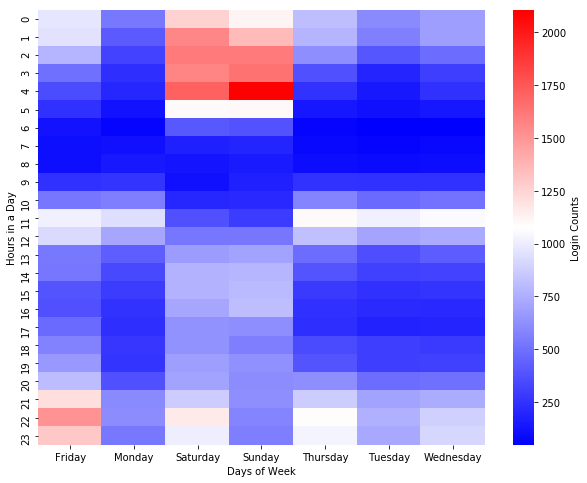

In [17]:
#Plot the heatmap to see the distribution of logins across a week
plt.figure(figsize=(10,8))
sns.heatmap(hourly_pivot, cmap='bwr',cbar_kws={'label': 'Login Counts', 'orientation': 'vertical'})
plt.ylabel("Hours in a Day")
plt.xlabel("Days of Week")
plt.show()

- From the heatmap we can see,that, the weekend has more activities than weekdays and weekend nights are busiest
- Most busiest hours are between about Friday 2030 to saturday 0500 and Sunday 0000 to 0500 hours
- In weekdays 0930 to 1230 hours are busier.

## Part 2 ‐ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

__Answer__ Average number of trips a driver makes between both cities can be the key measure of success

2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:


   a. how you will implement the experiment
   
   __Answer__ 
   
   step-1: Randomly select about 50 or more drivers and record their average trips between both the  cities daily during daytime and night for about 1-2 months __before implementing the toll cost reimbursement__.
              
   step-2: Record the average trips of those 50 or more drivers for 1-2 months __after implementing the toll cost reimbursment__. 
   
   b. what statistical test(s) you will conduct to verify the significance of the observation
   
   __Answer__ Perform t-test to see if there is increase in daily avarage trips between cities
   
   c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.
   
   __Answer__ I will perform the hypothesis test by setting the Null and Alternate hypothesis
      
      __Null Hypothesis__: There is no difference between the average number of trips made between the cities befor and after the implementation of toll cost reimbursment
      
      __Alternate Hypothesis__: There is an increase in average number of trips after implementing the toll cost reimbursment
      
    If the p-value from the t-test is < 0.05, we will reject the null hypothesis and say there is an increase in average trips made by the drivers between the cities due to toll cost reimbursment program.
    If the p-value from the t-test is >= 0.05, we fail to reject the null hypothesis and there is no increase in average number of trips so the experiment failed.
    
    __Caveat__:

## Part 3 ‐ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­term rider retention (again, a few sentences will suffice).

### Data description
● __city__: city this user signed up in

● __phone__: primary device for this user

● __signup_date__: date of account registration; in the form ‘YYYYMMDD’

● __last_trip_date__: the last time this user completed a trip; in the form ‘YYYYMMDD’

● __avg_dist__: the average distance in miles per trip taken in the first 30 days after signup

● __avg_rating_by_driver__: the rider’s average rating over all of their trips

● __avg_rating_of_driver__: the rider’s average rating of their drivers over all of their trips

● __surge_pct__: the percent of trips taken with surge multiplier > 1

● __avg_surge__: The average surge multiplier over all of this user’s trips

● __trips_in_first_30_days__: the number of trips this user took in the first 30 days after signing up

● __ultimate_black_user__: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise

● __weekday_pct__: the percent of the user’s trips occurring during a weekday


In [138]:
import json
# read json file, view first record
ult_json = json.loads(open('ultimate_data_challenge.json').read())
ult_json[0]

{'city': "King's Landing",
 'trips_in_first_30_days': 4,
 'signup_date': '2014-01-25',
 'avg_rating_of_driver': 4.7,
 'avg_surge': 1.1,
 'last_trip_date': '2014-06-17',
 'phone': 'iPhone',
 'surge_pct': 15.4,
 'ultimate_black_user': True,
 'weekday_pct': 46.2,
 'avg_dist': 3.67,
 'avg_rating_by_driver': 5.0}

In [139]:
# normalize the json file
from pandas.io.json import json_normalize
ultimate = json_normalize(ult_json)

In [140]:
# view the data head
ultimate.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


#### 1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

In [141]:
ultimate.shape

(50000, 12)

In [142]:
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [143]:
#There are some missing values in average ratings columns and will drop them since the data can not be easily imputed
ultimate = ultimate.dropna()
ultimate.shape

(41445, 12)

We will create a new column "active" where 1 for active users who took trip in 30 days and 0 for inactive users who has no trip in last 30 days. Befor that, we need to convert the "last_trip_date" column to pandas datetime and then apply the describe method to get most recent date the data was pulled.

In [119]:
pd.to_datetime(ultimate['last_trip_date']).describe()

count                   41445
unique                    182
top       2014-06-29 00:00:00
freq                     1924
first     2014-01-01 00:00:00
last      2014-07-01 00:00:00
Name: last_trip_date, dtype: object

In [120]:
from datetime import datetime as dt

last_date = datetime(2014, 7, 1)
last_date

datetime.datetime(2014, 7, 1, 0, 0)

In [145]:
#ultimate["last_trip_date"] = pd.to_datetime(ultimate.last_trip_date)
#ultimate["signup_date"] = pd.to_datetime(ultimate.signup_date)
ultimate["active"] = ((last_date - pd.to_datetime(ultimate.last_trip_date)) <= "30 days") * 1
ultimate.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


In [146]:
# Let's see how many are the active users
ultimate["active"].value_counts()

0    24410
1    17035
Name: active, dtype: int64

In [147]:
# proportion of active users or retained users
round(len(ultimate[ultimate.active == 1])/ len(ultimate), 3)

0.411

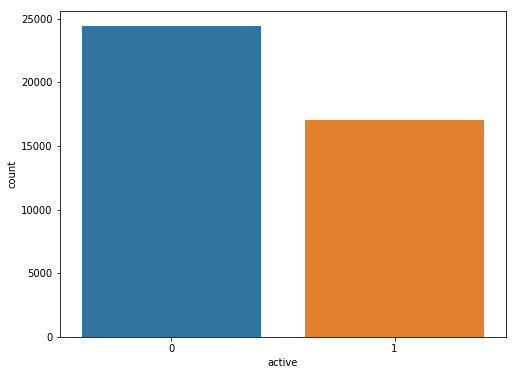

In [148]:
plt.figure(figsize=(8,6))
sns.countplot(x= 'active', data=ultimate);

Percentage of users retained is about 41%

In [149]:
ultimate.city.value_counts()

Winterfell        19161
Astapor           13509
King's Landing     8775
Name: city, dtype: int64

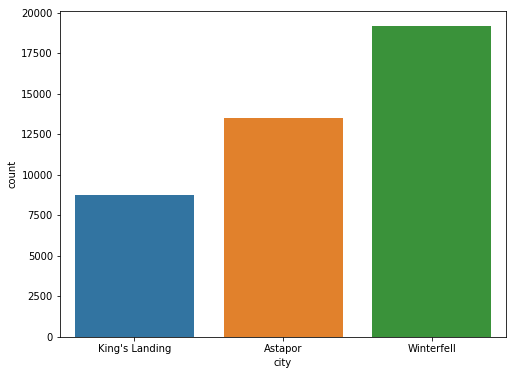

In [150]:
plt.figure(figsize=(8,6))
sns.countplot(x="city", data=ultimate);

In [151]:
ultimate.phone.value_counts()

iPhone     29352
Android    12093
Name: phone, dtype: int64

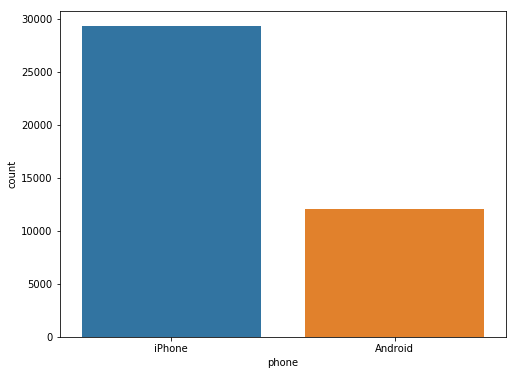

In [152]:
plt.figure(figsize=(8,6))
sns.countplot(x="phone", data=ultimate);

In [153]:
# convert all altimate black users to numeric
ultimate["ultimate_black_user"] = ultimate["ultimate_black_user"] * 1
ultimate.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,1,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,0,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,0,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,1,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,0,82.4,0


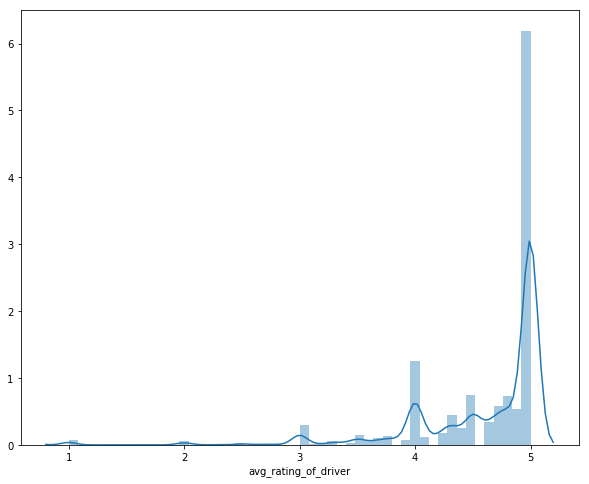

In [154]:
plt.figure(figsize=(10, 8))
sns.distplot(ultimate.avg_rating_of_driver);

In [155]:
ultimate.corr()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
avg_dist,1.000000,0.083190,0.034877,-0.085750,-0.110894,-0.136471,0.027206,0.102048,-0.089498
avg_rating_by_driver,0.083190,1.000000,0.122413,0.012418,0.019703,-0.045788,0.005708,0.018312,-0.034720
avg_rating_of_driver,0.034877,0.122413,1.000000,-0.022209,-0.001696,-0.011849,-0.003292,0.012975,-0.011829
avg_surge,-0.085750,0.012418,-0.022209,1.000000,0.795737,-0.000262,-0.070613,-0.118999,-0.004185
surge_pct,-0.110894,0.019703,-0.001696,0.795737,1.000000,0.005370,-0.099814,-0.155179,0.011126
trips_in_first_30_days,-0.136471,-0.045788,-0.011849,-0.000262,0.005370,1.000000,0.115066,0.055556,0.198816
ultimate_black_user,0.027206,0.005708,-0.003292,-0.070613,-0.099814,0.115066,1.000000,0.033964,0.217365
weekday_pct,0.102048,0.018312,0.012975,-0.118999,-0.155179,0.055556,0.033964,1.000000,0.010423
active,-0.089498,-0.034720,-0.011829,-0.004185,0.011126,0.198816,0.217365,0.010423,1.000000


- Percentage of users retained is about 41%
- Among the three cities more users from Winterfell signed up
- More users are using iPhone 
- Most of the drivers have rating from 4 to 5

In [170]:
# Code city and phone with get_dummies, drop one column per catagorical variable
ultimate_ML = pd.get_dummies(data=ultimate, columns=['city', 'phone'])
ultimate_ML.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 16 columns):
avg_dist                  41445 non-null float64
avg_rating_by_driver      41445 non-null float64
avg_rating_of_driver      41445 non-null float64
avg_surge                 41445 non-null float64
last_trip_date            41445 non-null object
signup_date               41445 non-null object
surge_pct                 41445 non-null float64
trips_in_first_30_days    41445 non-null int64
ultimate_black_user       41445 non-null int64
weekday_pct               41445 non-null float64
active                    41445 non-null int64
city_Astapor              41445 non-null uint8
city_King's Landing       41445 non-null uint8
city_Winterfell           41445 non-null uint8
phone_Android             41445 non-null uint8
phone_iPhone              41445 non-null uint8
dtypes: float64(6), int64(3), object(2), uint8(5)
memory usage: 5.2+ MB


#### 2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.


In [156]:
# Import scikit-learn tools, grid search cross validation, and classifiers
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# import Logistic Regression CV Classifier
from sklearn.linear_model import LogisticRegressionCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix


In [171]:
#set predictor variables and target variables
X = ultimate_ML.drop(columns=['active', "last_trip_date", "signup_date"])
y = ultimate_ML.active

In [172]:
X.shape

(41445, 13)

In [173]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

# Show the results of the split
print("X Training set sample size:", (X_train.shape[0]))
print("X Testing set sample size:", (X_test.shape[0]))
print("y Training set sample size:", (y_train.shape[0]))
print("y Testing set sample size:", (y_test.shape[0]))

X Training set sample size: 29011
X Testing set sample size: 12434
y Training set sample size: 29011
y Testing set sample size: 12434


### Binary Classification with Logistic RegressionCV

In [182]:
# Fit Logistic Regression with Cross Validation
lgr=LogisticRegressionCV(scoring='roc_auc').fit(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to 

In [183]:
print("training set score: %f" % lgr.score(X_train, y_train))
print('\n'"test set score: %f" % lgr.score(X_test, y_test))

training set score: 0.760424

test set score: 0.756013


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1926: ChangedBehaviorWarning: The long-standing behavior to use the accuracy score has changed. The scoring parameter is now used. This warning will disappear in version 0.22.
  ChangedBehaviorWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1926: ChangedBehaviorWarning: The long-standing behavior to use the accuracy score has changed. The scoring parameter is now used. This warning will disappear in version 0.22.
  ChangedBehaviorWarning)


In [180]:
# calculated predicted class label per sample: pred_lgr
pred_lgr = lgr.predict(X_test)

# print the confusion matrix 
print('\n''Confusion Matrix:''\n', metrics.confusion_matrix(y_test, pred_lgr))


Confusion Matrix:
 [[6006 1287]
 [2388 2753]]


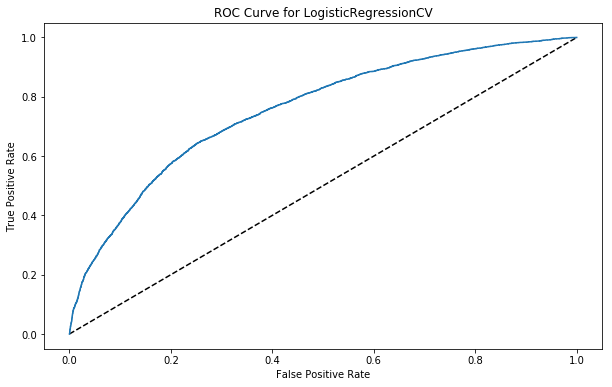

In [179]:
# calculate predicted probabilities for X_test Logistic Regression model
y_pred_prob_lgr = lgr.predict_proba(X_test)[:, 1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_lgr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LogisticRegressionCV')
plt.show()

In [181]:
# calculate AUC for LogisticRegressionCV classifier
print('\n''AUC score:', metrics.roc_auc_score(y_test, y_pred_prob_lgr))

# view paramaters of logistic regression CV
print('\n''parameters of current Logistic Regression CV model''\n',  lgr)


AUC score: 0.7560129588974973

parameters of current Logistic Regression CV model
 LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring='roc_auc',
           solver='lbfgs', tol=0.0001, verbose=0)


### Classification with Random Forest Classifier

In [184]:
# Instantiate and fit the random forest model. 
rf = RandomForestClassifier().fit(X_train, y_train) 

## And score it on your testing data.
print("training set score: %f" % rf.score(X_train, y_train))
print('\n'"test set score: %f" % rf.score(X_test, y_test))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


training set score: 0.978250

test set score: 0.741274


In [185]:
# calculated predicted class label per sample: pred_rf
pred_rf = rf.predict(X_test)

# print the confusion matrix 
print('\n''Confusion matrix:''\n', metrics.confusion_matrix(y_test, pred_rf))


Confusion matrix:
 [[5954 1339]
 [1878 3263]]


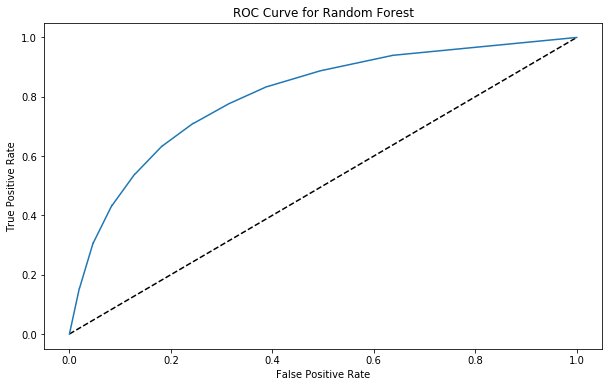

In [187]:
# calculate predicted probabilities
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rf)

# Plot ROC curve
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.show()

In [188]:
# calculate AUC for randomforest model
print('AUC Score for Random Forest Model', metrics.roc_auc_score(y_test, y_pred_prob_rf))

AUC Score for Random Forest Model 0.801572483071848


In [189]:
# find best parameters with GridSearchCV
# create a list of performace parameters for performace tuning
params = {'max_features': [2,4,6,8],
              'min_samples_leaf': [4, 6, 8, 10],
              'min_samples_split': [3, 7, 8, 10],
         }

In [190]:
# create an instance of the grid search by passing the classifier, parameters 
# and n_jobs=-1 which tells to use multiple cores from user machine.
gs_rf = GridSearchCV(RandomForestClassifier(), params, scoring='roc_auc', n_jobs=-1)
gs_rf = gs_rf.fit(X_train, y_train) 

# View the best AUC score
print('\n''Best score:', gs_rf.best_score_) 

# Get best parameters
print('\n''Best parameters:', gs_rf.best_params_)

# Explore feature importances
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
# Print sorted list of feature importances
feature_importances

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)



Best score: 0.8440793638178837

Best parameters: {'max_features': 2, 'min_samples_leaf': 10, 'min_samples_split': 10}


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,importance
avg_dist,0.268130
weekday_pct,0.155760
avg_rating_by_driver,0.114588
surge_pct,0.083731
avg_rating_of_driver,0.082725
trips_in_first_30_days,0.081123
avg_surge,0.063198
city_King's Landing,0.051212
ultimate_black_user,0.033561
phone_Android,0.020641


In this problem I used supervised machine learning classification algorithms to predict which user will retain as a customer of Ultimate passenger system. I implemented and compared Logistic Regression and Random Forest classifier to classify the users in the test data as either active or not. Random Forest classifier with hyperparameter tuning performed best with ROC-AUC score of 0.844. The variables with highest importance values were the average distance in miles per trip taken in the first 30 days after signup, the rider’s average rating over all of their trips and the percent of the user’s trips occurring during a weekday.


#### 3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­term rider retention (again, a few sentences will suffice).


Ultimate passenger system can target the influential features obtained from the model to retain the users. Increasing the average distance per trip by giving some discounts in the first 30 days. 